In [1]:
import numpy as np
import pandas as pd

In [2]:
value = np.nan

In [3]:
pd.isnull(value)

True

In [4]:
value = None

In [5]:
pd.notnull(value)

False

In [6]:
pd.isnull(pd.Series([None, 2, np.nan, ""]))

0     True
1    False
2     True
3    False
dtype: bool

In [7]:
pd.isnull(pd.DataFrame({
    'Sütun A': [1, np.nan, 7],
    'Sütun B': [np.nan, 2, np.nan]
}))

,Sütun A,Sütun B
0,False,True
1,True,False
2,False,True


In [8]:
s = pd.Series([1, 2, np.nan, 4, np.nan])

In [9]:
s

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [11]:
s[pd.notnull(s)] # None veren değerleri görmezden gelme

0    1.0
1    2.0
3    4.0
dtype: float64

In [12]:
s.dropna() # boş verilerin silinmesini sağlamaktadır

0    1.0
1    2.0
3    4.0
dtype: float64

In [13]:
# Boş değerleri doldurma

In [14]:
df = pd.DataFrame({
    'Sütun A': [1, np.nan, 30, np.nan],
    'Sütun B': [2, 8, 31, np.nan],
    'Sütun C': [np.nan, 9, 32, 100],
    'Sütun D': [5, 8, 34, 110],
})

In [25]:
pd.isnull(df)

,Sütun A,Sütun B,Sütun C,Sütun D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [16]:
df[pd.isnull(df),a]

,Sütun A,Sütun B,Sütun C,Sütun D
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [17]:
df

,Sütun A,Sütun B,Sütun C,Sütun D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [22]:
df.dropna() #Varsayılan olarak NaN bulunan bütün satırlar silinecektir

,Sütun A,Sütun B,Sütun C,Sütun D
2,30.0,31.0,32.0,34


In [23]:
df.dropna(axis = 1) # NaN bulunan bütün satırlar silincektir.

,Sütun D
0,5
1,8
2,34
3,110


In [26]:
df2 = pd.DataFrame({
    'Sütun A': [1, np.nan, 30],
    'Sütun B': [2, np.nan, 31],
    'Sütun C': [np.nan, np.nan, 100]
})

In [27]:
df2

,Sütun A,Sütun B,Sütun C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [28]:
df2.dropna(how="all") # Eğer satırnda bütün değerler boş ise sil demek anlamına gelmektedir. 
#Default olarak any olamaktadır yani bir tek değer bile NaN ise satır silinecek anlamındadır.


,Sütun A,Sütun B,Sütun C
0,1.0,2.0,NaN
2,30.0,31.0,100.0


In [29]:
# Null değer olan verilerin doldurulması
s = pd.Series([1.0,2.0,None,4.0,None])

In [30]:
s

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [31]:
s.fillna(0) # NaN olan bütün değerler belirlediğimiz değerler ile doldurulacaktır.

0    1.0
1    2.0
2    0.0
3    4.0
4    0.0
dtype: float64

In [32]:
s.fillna(s.mean()) # Ortalaması ile doldurulmaktadır.

0    1.000000
1    2.000000
2    2.333333
3    4.000000
4    2.333333
dtype: float64

In [33]:
s.fillna(method="ffill") # Değerler bir önceki değer ile doldurulmasını sağlayacaktır

0    1.0
1    2.0
2    2.0
3    4.0
4    4.0
dtype: float64

In [34]:
s.fillna(method="bfill") # Değerler bir sonraki değerler ile doldurulması sağlanacaktır.

0    1.0
1    2.0
2    4.0
3    4.0
4    NaN
dtype: float64

In [35]:
s.size()

TypeError: 'int' object is not callable

In [37]:
s[s.size-1] = s.mean()

In [41]:
s = s.fillna(method = "bfill")

In [42]:
s

0    1.000000
1    2.000000
2    4.000000
3    4.000000
4    2.333333
dtype: float64

In [43]:
#Tekrarlanan değerler ve metin işleme

In [44]:
elciler = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [45]:
elciler

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [47]:
elciler.duplicated() # Bu tekrarlanan değerin ilk gelişinde false yapar sonraki durumlarını ise true yapar

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [48]:
elciler.duplicated(keep = "last") # Bu da tekralanan ilk değeri de true yapılmasını sağlamaktaıdır.

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [50]:
elciler.drop_duplicates(keep = False) # Tekrarlanan tüm veriler silinmektedir.

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

In [51]:
elciler.drop_duplicates(keep = "first") # İlk değer hariç tekrarkana tüm değerleri silinecektir

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [52]:
#Metin işleme

In [53]:
##Sütünlara Ayırma

In [54]:
df = pd.DataFrame({
    'Veri': [
        '1987_E_ABD _1',
        '1990?_E_ING_1',
        '1992_K_ABD_2',
        '1970?_E_   IT_1',
        '1985_K_I  T_2'
]})

In [55]:
df["Veri"].str.split("_")

0      [1987, E, ABD , 1]
1      [1990?, E, ING, 1]
2       [1992, K, ABD, 2]
3    [1970?, E,    IT, 1]
4      [1985, K, I  T, 2]
Name: Veri, dtype: object

In [58]:
df = df["Veri"].str.split("_",expand = True) # Verileri sütunlara ayrılmasını sağlamaktadır

In [59]:
df.columns = ["Yıl","Cinsiyet","Ülke","Çocuk Sayısı"]

In [60]:
df

,Yıl,Cinsiyet,Ülke,Çocuk Sayısı
0,1987,E,ABD,1
1,1990?,E,ING,1
2,1992,K,ABD,2
3,1970?,E,IT,1
4,1985,K,I T,2


In [61]:
df["Yıl"].str.contains("\?") # soru işareti içeriyormu

0    False
1     True
2    False
3     True
4    False
Name: Yıl, dtype: bool

In [62]:
df["Yıl"] = df["Yıl"].str.replace("\?","") # ? bulunan veriler boş string ile değiştirilecektir 

/var/folders/rg/lbkvy8yj5vn7qgrbx7rz3t7r0000gn/T/ipykernel_28385/35667968.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Yıl"] = df["Yıl"].str.replace("\?","") # ? bulunan veriler boş string ile değiştirilecektir


In [63]:
df["Yıl"]

0    1987
1    1990
2    1992
3    1970
4    1985
Name: Yıl, dtype: object

In [64]:
df["Ülke"] = df["Ülke"].str.replace(" ","")

In [65]:
df["Ülke"]

0    ABD
1    ING
2    ABD
3     IT
4     IT
Name: Ülke, dtype: object

In [66]:
df

,Yıl,Cinsiyet,Ülke,Çocuk Sayısı
0,1987,E,ABD,1
1,1990,E,ING,1
2,1992,K,ABD,2
3,1970,E,IT,1
4,1985,K,IT,2


In [78]:
oran = df["Çocuk Sayısı"].astype('int')

In [81]:
oran = oran / oran.mean()

In [82]:
oran

0    0.714286
1    0.714286
2    1.428571
3    0.714286
4    1.428571
Name: Çocuk Sayısı, dtype: float64

In [83]:
df["Oran"] = oran

In [84]:
df

,Yıl,Cinsiyet,Ülke,Çocuk Sayısı,Oran
0,1987,E,ABD,1,0.714286
1,1990,E,ING,1,0.714286
2,1992,K,ABD,2,1.428571
3,1970,E,IT,1,0.714286
4,1985,K,IT,2,1.428571


In [88]:
import matplotlib.pyplot as plt

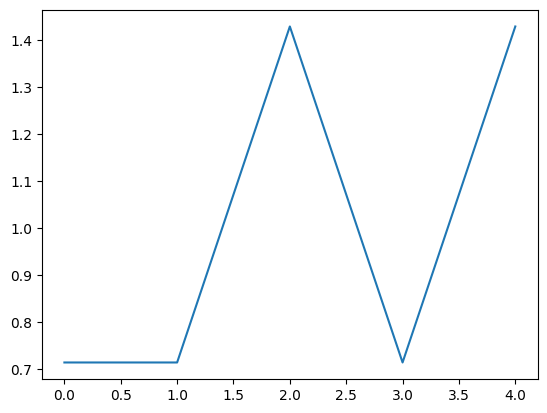

In [90]:
plt.plot(df["Oran"])

<AxesSubplot: >

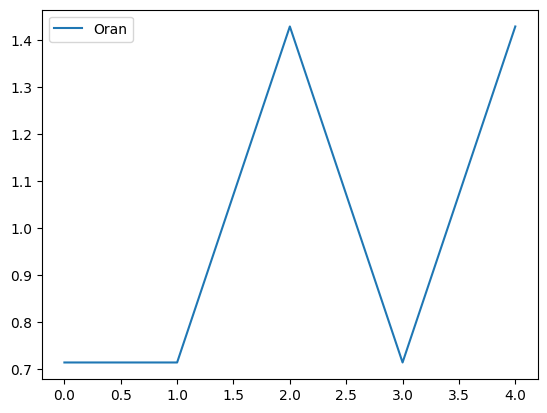

In [91]:
df.plot()